In [1]:
# new accuracy & precision plots; 
# collect all data so that no other loading of data would be needed. 
import collections

import compress_pickle
import copy
import editdistance
import itertools
import libsbml
import numpy as np
import operator
import os
import pickle
import pandas as pd
import sys
import time
import matplotlib.pyplot as plt
%matplotlib inline  

BIOMD_12 = 'BIOMD0000000012.xml'
BASE_DIR = '/Users/woosubshin/Desktop/AutomateAnnotation/'
DATA_DIR = os.path.join(BASE_DIR, "DATA")
ALGO_DIR = os.path.join(DATA_DIR, "algo")
CHEBI_DIR = os.path.join(DATA_DIR, "chebi")
FIGURE_DIR = '/Users/woosubshin/Desktop/AutomateAnnotation/AMAS_suppl/figure_files'
RHEA_DIR = os.path.join(DATA_DIR, "rhea")
BIOMODEL_DIR = os.path.join(DATA_DIR, "biomodels/curated_biomodels_31mar2021")
BIGG_DIR = '/Users/woosubshin/Desktop/AutomateAnnotation/DATA/bigg'
ecoli_fpath = os.path.join(BIGG_DIR, "e_coli_core.xml")

PROJ_DIR = os.path.join(os.getcwd(), os.pardir)
AMAS_DIR = os.path.join(PROJ_DIR, "AMAS")
sys.path.append(PROJ_DIR)

SUPPL_DIR = os.path.join(PROJ_DIR, os.pardir, "AMAS_suppl")
ACCURACY_DIR = os.path.join(SUPPL_DIR, "data_for_credibility")

# address changed - as of May 12, 2023. 
MANU_FIGURE_DIR = '/Users/woosubshin/Desktop/AutomateAnnotation/writeup/AMAS/Manu_figures_new'
SUPPL_FIGURE_DIR = '/Users/woosubshin/Desktop/AutomateAnnotation/writeup/AMAS/Supple_figures_new'
# TEMPFIG_DIR = os.path.join(FIGURE_DIR, 'temp')

from AMAS import species_annotation as sa
from AMAS import reaction_annotation as ra
from AMAS import recommender
from AMAS import constants as cn
from AMAS import iterator as it
from AMAS import tools

biggs = [val for val in os.listdir(BIGG_DIR) if val[-4:]=='.xml']
print("Number of BiGG models to be analyzed: %d" % len(biggs))

spec_ml_df = pd.read_csv(os.path.join(ACCURACY_DIR, 'biomd_individual_species_accuracy.csv'))
biomds_spec = np.unique(spec_ml_df['model'])
print("Number of BioModels to be analyzed for SPECIES: %d" % len(biomds_spec))

reac_ml_df = pd.read_csv(os.path.join(ACCURACY_DIR, 'biomd_individual_reactions_accuracy.csv'))
biomds_reac = np.unique(reac_ml_df['model'])
print("Number of BioModels to be analyzed for REACTIONS: %d" % len(biomds_reac))

Number of BiGG models to be analyzed: 108
Number of BioModels to be analyzed for SPECIES: 306
Number of BioModels to be analyzed for REACTIONS: 131


In [2]:
len(set(biomds_spec).intersection(biomds_reac))

83

## 1. Data & Plots for BioModels Species

In [18]:
# # First data; BioModels Species

# total_time = 0

# model_names = []
# len_names = []
# num_cands = []
# num_formulas = []
# match_scores = []
# is_correct_included = []
# inv_num_candidates = []
# total_recalls = []
# total_precisions = []
# #
# for idx, one_biomd in enumerate(biomds_spec):
#   if idx % 50 == 0:
#     print("We are at", idx)
#   one_fpath = os.path.join(BIOMODEL_DIR, one_biomd)
#   recom = recommender.Recommender(libsbml_fpath=one_fpath)
#   # find species that can be evaluated
#   specs2evaluate = list(recom.species.exist_annotation_formula.keys())
#   # run algorithm if there is at least one species to evaluate
#   if specs2evaluate:
#     time1 = time.time()
#     recoms = recom.getSpeciesListRecommendation(pred_ids=specs2evaluate,
#                                                 mssc='top',
#                                                 cutoff=0.0)
#     time2 = time.time()
#     pred_time = time2 - time1 
#     total_time += pred_time
#     # statistics
#     refs = {val:recom.species.exist_annotation_formula[val] \
#             for val in specs2evaluate}
#     preds_raw = {val.id: [k[0] for k in val.candidates] for val in recoms}

#     preds = {k: list(set([cn.REF_CHEBI2FORMULA[k] for k in preds_raw[k] if k in cn.REF_CHEBI2FORMULA.keys()])) \
#              for k in preds_raw.keys()}
#     recalls = tools.getRecall(ref=refs, pred=preds, mean=False)
#     precisions = tools.getPrecision(ref=refs, pred=preds, mean=False)

#     # one_recom per each species
#     for one_recom in recoms:
#       model_names.append(one_biomd)
#       one_spec = one_recom.id
#       len_names.append(len(recom.species.getNameToUse(one_spec)))
#       num_cands.append(len(one_recom.candidates))
#       num_formulas.append(len(recom.species.formula[one_recom.id]))
#       match_scores.append(one_recom.candidates[0][1])
#       if recalls[one_spec] > 0:
#         is_correct_included.append(1)
#       else:
#         is_correct_included.append(0)
#       inv_num_candidates.append(1/len(one_recom.candidates))
#       total_recalls.append(recalls[one_spec])
#       total_precisions.append(precisions[one_spec])

# biomd_spec_df = pd.DataFrame({'model': model_names,
#                               'name_length': len_names,
#                               'num_candidates': num_cands,
#                               'num_formulas': num_formulas,
#                               'match_score': match_scores,
#                               'accuracy': is_correct_included,
#                               'exactness': inv_num_candidates,
#                               'recall': total_recalls,
#                               'precision': total_precisions})

# print("Total time for prediction: %.02f" % total_time)
# print("Average time for prediction: %.02f" % (total_time/biomd_spec_df.shape[0]))

We are at 0
We are at 50
We are at 100
We are at 150
We are at 200
We are at 250
We are at 300
Total time for prediction: 591.78
Average time for prediction: 0.12


In [3]:
# biomd_spec_df.to_csv(os.path.join(ACCURACY_DIR, 'biomd_species_plot_data.csv'), index=False)

biomd_spec_df = pd.read_csv(os.path.join(ACCURACY_DIR, 'biomd_species_plot_data.csv'))
print(biomd_spec_df.shape)
biomd_spec_df.head()

(4902, 9)


,model,name_length,num_candidates,num_formulas,match_score,accuracy,exactness,recall,precision
0,BIOMD0000000002.xml,3,2,2,1.000,1,0.500000,1.0,0.500
1,BIOMD0000000013.xml,5,4,3,0.866,1,0.250000,1.0,0.333
2,BIOMD0000000013.xml,6,6,6,0.894,0,0.166667,0.0,0.000
3,BIOMD0000000013.xml,10,2,1,0.849,1,0.500000,1.0,1.000
4,BIOMD0000000013.xml,6,1,1,0.868,0,1.000000,0.0,0.000


In [20]:
def draw_plot(df, degen_col, val_col, x_label, save_path):
  """
  Draw a (scatter) plot and save it
  
  Parameters
  ----------
  df: pandas.DataFrame
  
  degen_col: str
      Column name for degenerate case
      
  val_col: str
      Column name for values to summarize
      
  x_lavel: str
      Name of X axis
  
  save_path: str
      File path to save it. 
  """
  cutoffs = np.arange(0.0, 1.05, step=0.001)
  vals = dict()

  for one_degen in range(0, 5):
    ys = []
    xs = []
    val_tuples = []
    cut_df = df[df[degen_col]>one_degen]
    for one_c in cutoffs:
      xs.append(one_c)
      sub_df = cut_df[cut_df['match_score']>=one_c]
      prop_or_mean_value = np.mean(sub_df[val_col])
      ys.append(prop_or_mean_value)
      val_tuples.append((one_c, prop_or_mean_value))
    vals[str(one_degen)] = val_tuples
    plt.scatter(xs, ys, s=5, label='reject: <=%d'%one_degen)
  plt.legend(loc='lower left')
  plt.ylim([-0.05,1.05])
  plt.xlabel(x_label)
  plt.ylabel(val_col)
  plt.savefig(save_path, dpi=300, bbox_inches='tight', pad_inches=0.0)
  plt.show()

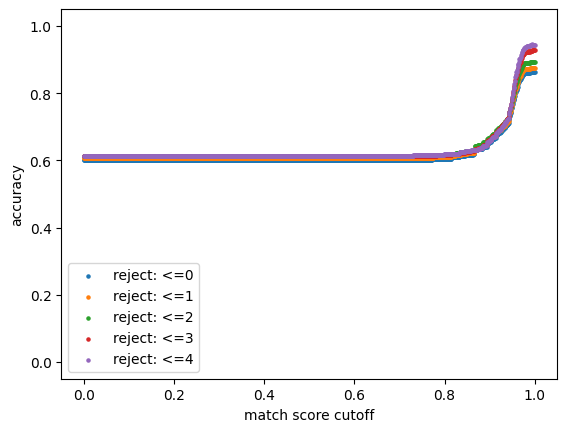

In [21]:
draw_plot(df=biomd_spec_df,
          degen_col='name_length',
          val_col='accuracy',
          x_label='match score cutoff',
          save_path=os.path.join(MANU_FIGURE_DIR, 'f21-accuracy-species-biomd.pdf'))

## 2. Data & Plots for BioModels Reactions

In [6]:
def getRheaElementNum(inp_rhea, inp_df=ra.REF_MAT):
  """
  Get Number of elements of
  the given rhea term.
  
  Parameters
  ----------
  inp_rhea: str
  
  Returns
  -------
  : int
  """
  return len(inp_df.loc[inp_rhea, :].to_numpy().nonzero()[0])

total_time = 0

model_names = []
num_rhea_eles = []
num_query_eles = []
num_candidates = []
val_match_scores = []
is_correct_included = []
inv_num_candidates = []
total_recalls = []
total_precisions = []


for idx, one_biomd in enumerate(biomds_reac):
  if idx % 20 == 0:
    print("We are at", idx)
  one_fpath = os.path.join(BIOMODEL_DIR, one_biomd)
  recom = recommender.Recommender(libsbml_fpath=one_fpath)
  reac2evaluate = list(recom.reactions.exist_annotation.keys())
  if reac2evaluate:  
    time1 = time.time()
    recoms = recom.getReactionListRecommendation(pred_ids=reac2evaluate,
                                                 mssc='top',
                                                 cutoff=0.0)
    time2 = time.time()
    pred_time = time2 - time1 
    total_time += pred_time    
    # Handling an empty prediction; (biomd 7) include total time for computation,
    # but remove from the resulting dataframe
    filt_recoms = [val for val in recoms if val.candidates]
    refs = {val:recom.reactions.exist_annotation[val] \
            for val in reac2evaluate}   
    preds = {val.id: [k[0] for k in val.candidates] for val in filt_recoms}

    recalls = tools.getRecall(ref=refs, pred=preds, mean=False)
    precisions = tools.getPrecision(ref=refs, pred=preds, mean=False)

    # handling absolutely no match
    for one_recom in filt_recoms:
      one_reac = one_recom.id
      match_scores = [val[1] for val in one_recom.candidates]
      num_ref_elements = [getRheaElementNum(val[0]) for val in one_recom.candidates]
      #
      mean_num_rhea_elements = np.mean(num_ref_elements)   
      # this is actually the number of reaction components;
      num_query_ele = len(recom.reactions.reaction_components[one_reac])
      num_cands = len(match_scores)
      mean_match_score = np.mean(match_scores)
      #
      model_names.append(one_biomd)
      num_rhea_eles.append(mean_num_rhea_elements)
      num_query_eles.append(num_query_ele)
      num_candidates.append(num_cands)
      val_match_scores.append(mean_match_score)
      if recalls[one_reac] > 0.0:
        is_correct_included.append(1)
      else:
        is_correct_included.append(0)
      inv_num_candidates.append(1/len(one_recom.candidates))
      total_recalls.append(recalls[one_reac])
      total_precisions.append(precisions[one_reac])
        
biomd_reac_df = pd.DataFrame({'model': model_names,
                              'mean_num_rhea_elements': num_rhea_eles,
                              'num_query_elements': num_query_eles,
                              'num_candidates': num_candidates,
                              'match_score': val_match_scores,
                              'accuracy': is_correct_included,
                              'exactness': inv_num_candidates,
                              'recall': total_recalls,
                              'precision': total_precisions})

print("Total time for prediction: %.02f" % total_time)
print("Average time for prediction: %.02f" % (total_time/biomd_reac_df.shape[0]))

We are at 0
We are at 20
We are at 40
We are at 60
We are at 80
We are at 100
We are at 120
Total time for prediction: 489.06
Average time for prediction: 0.22


In [4]:
# biomd_reac_df.to_csv(os.path.join(ACCURACY_DIR, 'biomd_reactions_plot_data_jaccard.csv'), index=False)

# now ther version is minimax
# biomd_reac_df.to_csv(os.path.join(ACCURACY_DIR, 'biomd_reactions_plot_data.csv'), index=False)

biomd_reac_df = pd.read_csv(os.path.join(ACCURACY_DIR, 'biomd_reactions_plot_data.csv'))

In [5]:
biomd_reac_df.shape

(2188, 9)

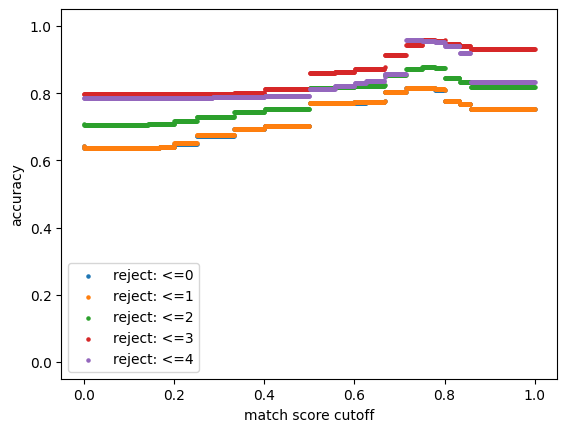

In [9]:
draw_plot(df=biomd_reac_df,
          degen_col='num_query_elements',
          val_col='accuracy',
          x_label='match score cutoff',
          save_path=os.path.join(MANU_FIGURE_DIR, 'f22-accuracy-reactions-biomd.pdf'))

In [10]:
# draw_plot(df=biomd_reac_df,
#           degen_col='num_query_elements',
#           val_col='precision',
#           x_label='minimum match score',
#           save_path=os.path.join(TEMPFIG_DIR, 'biomd_reactions_precision.png'))

In [58]:
os.path.abspath("agora2_checking.ipynb")

'/Users/woosubshin/Desktop/AutomateAnnotation/AMAS/notebooks/agora2_checking.ipynb'

## 3. Data & Plots for BiGG Species

In [12]:
bigg_num_species = []
for idx, one_bigg in enumerate(biggs):
  if idx % 10 == 0:
    print("We are at", idx)
  one_fpath = os.path.join(BIGG_DIR, one_bigg)
  recom = recommender.Recommender(libsbml_fpath=one_fpath)
  specs2evaluate = list(recom.species.exist_annotation_formula.keys())
  bigg_num_species.append(len(specs2evaluate))

We are at 0
We are at 10
We are at 20
We are at 30
We are at 40
We are at 50
We are at 60
We are at 70
We are at 80
We are at 90
We are at 100


In [67]:
# times_str = 0
# times_f = 0

# reader = libsbml.SBMLReader()
# for idx, one_bigg in enumerate(biggs):
#   if idx % 20 == 0:
#     print("We are at", idx)
#   one_fpath = os.path.join(BIGG_DIR, one_bigg)
#   time_begin1 = time.time()
#   with open(one_fpath, 'r') as file:
#     model_str = file.read()
#   document = reader.readSBMLFromString(model_str)
#   model = document.getModel()
#   time_end1 = time.time()
#   times_str += time_end1-time_begin1
#   #
#   time_begin2 = time.time()
#   document = reader.readSBML(one_fpath)
#   model = document.getModel()
#   time_end2 = time.time()
#   times_f += time_end2-time_begin2
# print("String read:", np.round(times_str, 2))
# print("File read:", np.round(times_f, 2))

In [68]:
# print(times_str / 108)
# print(times_f / 108)

In [25]:
# # BiGG Species

# total_time = 0

# model_names = []
# len_names = []
# num_cands = []
# num_formulas = []
# match_scores = []
# is_correct_included = []
# inv_num_candidates = []
# total_recalls = []
# total_precisions = []
# #
# for idx, one_bigg in enumerate(biggs):
#   if idx % 20 == 0:
#     print("We are at", idx)
#   one_fpath = os.path.join(BIGG_DIR, one_bigg)
#   recom = recommender.Recommender(libsbml_fpath=one_fpath)
#   specs2evaluate = list(recom.species.exist_annotation_formula.keys())
#   # run algorithm if there is at least one species to evaluate
#   if specs2evaluate:
#     time1 = time.time()
#     recoms = recom.getSpeciesListRecommendation(pred_ids=specs2evaluate,
#                                                 mssc='top',
#                                                 cutoff=0.0)
#     time2 = time.time()
#     pred_time = time2 - time1 
#     total_time += pred_time
#     # statistics
#     refs = {val:recom.species.exist_annotation_formula[val] \
#             for val in specs2evaluate}
    
#     preds_raw = {val.id: [k[0] for k in val.candidates] for val in recoms}

#     preds = {k: list(set([cn.REF_CHEBI2FORMULA[k] \
#                           for k in preds_raw[k] if k in cn.REF_CHEBI2FORMULA.keys()])) \
#              for k in preds_raw.keys()}
#     recalls = tools.getRecall(ref=refs, pred=preds, mean=False)
#     precisions = tools.getPrecision(ref=refs, pred=preds, mean=False)

#     # one_recom per each species
#     for one_recom in recoms:
#       model_names.append(one_bigg)
#       one_spec = one_recom.id
#       len_names.append(len(recom.species.getNameToUse(one_spec)))
#       num_cands.append(len(one_recom.candidates))
#       num_formulas.append(len(recom.species.formula[one_recom.id]))
#       match_scores.append(one_recom.candidates[0][1])
#       if recalls[one_spec] > 0:
#         is_correct_included.append(1)
#       else:
#         is_correct_included.append(0)
#       inv_num_candidates.append(1/len(one_recom.candidates))
#       total_recalls.append(recalls[one_spec])
#       total_precisions.append(precisions[one_spec])

# bigg_spec_df = pd.DataFrame({'model': model_names,
#                              'name_length': len_names,
#                              'num_candidates': num_cands,
#                              'num_formulas': num_formulas,
#                              'match_score': match_scores,
#                              'accuracy': is_correct_included,
#                              'exactness': inv_num_candidates,
#                              'recall': total_recalls,
#                              'precision': total_precisions})

# print("Total time for prediction: %.02f" % total_time)
# print("Average time for prediction: %.02f" % (total_time/bigg_spec_df.shape[0]))

We are at 0
We are at 20
We are at 40
We are at 60
We are at 80
We are at 100
Total time for prediction: 16003.00
Average time for prediction: 0.12


In [6]:
# bigg_spec_df.to_csv(os.path.join(ACCURACY_DIR, 'bigg_species_plot_data.csv'), index=False)

bigg_spec_df = pd.read_csv(os.path.join(ACCURACY_DIR, 'bigg_species_plot_data.csv'))
bigg_spec_df.shape

(133233, 9)

In [7]:
bigg_spec_df.head()

,model,name_length,num_candidates,num_formulas,match_score,accuracy,exactness,recall,precision
0,iCHOv1.xml,23,3,1,1.000,1,0.333333,1.0,1.0
1,iCHOv1.xml,23,3,1,1.000,1,0.333333,1.0,1.0
2,iCHOv1.xml,25,1,1,1.000,1,1.000000,1.0,1.0
3,iCHOv1.xml,23,3,1,1.000,1,0.333333,1.0,1.0
4,iCHOv1.xml,27,1,1,0.958,0,1.000000,0.0,0.0


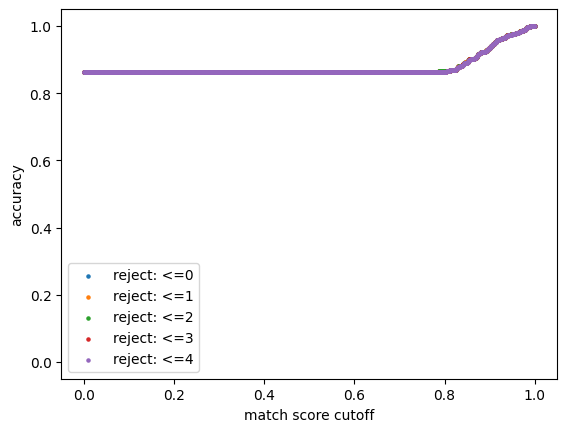

In [28]:
draw_plot(df=bigg_spec_df,
          degen_col='name_length',
          val_col='accuracy',
          x_label='match score cutoff',
          save_path=os.path.join(MANU_FIGURE_DIR, 'f11-accuracy-species-bigg.pdf'))

In [21]:
# TODO: (1) DO THE SAME THING WITH (one bigg model with about 1000 species?!
# as 108/306 models wanted to be added
# (2) do the same two plots of reactions

In [22]:
# num_bigg_specs = []
# num_bigg_reacs = []
# for idx, one_biomd in enumerate(biggs):
#   if idx % 30 == 0:
#     print("We are at", idx)
#   one_fpath = os.path.join(BIGG_DIR, one_biomd)
#   recom = recommender.Recommender(libsbml_fpath=one_fpath)
#   specs2evaluate = list(recom.species.exist_annotation_formula.keys())
#   reacs2evaluate = list(recom.reactions.exist_annotation.keys())
#   num_bigg_specs.append(len(specs2evaluate))
#   num_bigg_reacs.append(len(reacs2evaluate))

In [23]:
# bigg_df = pd.DataFrame(zip(biggs, num_bigg_specs, num_bigg_reacs), columns=['model', 'species', 'reactions'])
# bigg_df.head()

## 4. Data & Plots for BiGG Reactions

In [22]:
# # BiGG reactions (by predicting species annotations)
# total_time = 0

# model_names = []
# num_rhea_eles = []
# num_query_eles = []
# num_candidates = []
# val_match_scores = []
# is_correct_included = []
# inv_num_candidates = []
# total_recalls = []
# total_precisions = []


# for idx, one_bigg in enumerate(biggs):
#   if idx % 20 == 0:
#     print("We are at", idx)
#   one_fpath = os.path.join(BIGG_DIR, one_bigg)
#   recom = recommender.Recommender(libsbml_fpath=one_fpath)
#   reac2evaluate = list(recom.reactions.exist_annotation.keys())
#   if reac2evaluate:  
#     time1 = time.time()
#     recoms = recom.getReactionListRecommendation(pred_ids=reac2evaluate,
#                                                  mssc='top',
#                                                  cutoff=0.0)
#     time2 = time.time()
#     pred_time = time2 - time1 
#     total_time += pred_time    
#     # Handling an empty prediction; (biomd 7) include total time for computation,
#     # but remove from the resulting dataframe
#     filt_recoms = [val for val in recoms if val.candidates]    
    
    
#     refs = {val:recom.reactions.exist_annotation[val] \
#             for val in reac2evaluate}   
#     preds = {val.id: [k[0] for k in val.candidates] for val in filt_recoms}

#     recalls = tools.getRecall(ref=refs, pred=preds, mean=False)
#     precisions = tools.getPrecision(ref=refs, pred=preds, mean=False)

#     for one_recom in filt_recoms:
#       one_reac = one_recom.id
#       match_scores = [val[1] for val in one_recom.candidates]
#       num_ref_elements = [getRheaElementNum(val[0]) for val in one_recom.candidates]
#       #
#       mean_num_rhea_elements = np.mean(num_ref_elements)   
#       # this is actually the number of reaction components;
#       num_query_ele = len(recom.reactions.reaction_components[one_reac])
#       num_cands = len(match_scores)
#       mean_match_score = np.mean(match_scores)
#       #
#       model_names.append(one_bigg)
#       num_rhea_eles.append(mean_num_rhea_elements)
#       num_query_eles.append(num_query_ele)
#       num_candidates.append(num_cands)
#       val_match_scores.append(mean_match_score)
#       if recalls[one_reac] > 0.0:
#         is_correct_included.append(1)
#       else:
#         is_correct_included.append(0)
#       inv_num_candidates.append(1/len(one_recom.candidates))
#       total_recalls.append(recalls[one_reac])
#       total_precisions.append(precisions[one_reac])
        

# bigg_reac_df = pd.DataFrame({'model': model_names,
#                               'mean_num_rhea_elements': num_rhea_eles,
#                               'num_query_elements': num_query_eles,
#                               'num_candidates': num_candidates,
#                               'match_score': val_match_scores,
#                               'accuracy': is_correct_included,
#                               'exactness': inv_num_candidates,
#                               'recall': total_recalls,
#                               'precision': total_precisions})

# print("Total time for prediction: %.02f" % total_time)
# print("Average time for prediction: %.02f" % (total_time/bigg_reac_df.shape[0]))

We are at 0
We are at 20
We are at 40
We are at 60
We are at 80
We are at 100
Total time for prediction: 25911.53
Average time for prediction: 0.21


In [8]:
# pred_species & minimax
# bigg_reac_df.to_csv(os.path.join(ACCURACY_DIR, 'bigg_reactions_plot_data.csv'), index=False)

bigg_reac_df = pd.read_csv(os.path.join(ACCURACY_DIR, 'bigg_reactions_plot_data.csv'))
bigg_reac_df.head()

,model,mean_num_rhea_elements,num_query_elements,num_candidates,match_score,accuracy,exactness,recall,precision
0,iCHOv1.xml,5.0,4,2,1.0,0,0.5,0.0,0.0
1,iCHOv1.xml,5.0,5,2,0.8,0,0.5,0.0,0.0
2,iCHOv1.xml,4.0,4,1,1.0,1,1.0,0.5,1.0
3,iCHOv1.xml,5.0,5,2,0.8,0,0.5,0.0,0.0
4,iCHOv1.xml,4.0,5,1,1.0,0,1.0,0.0,0.0


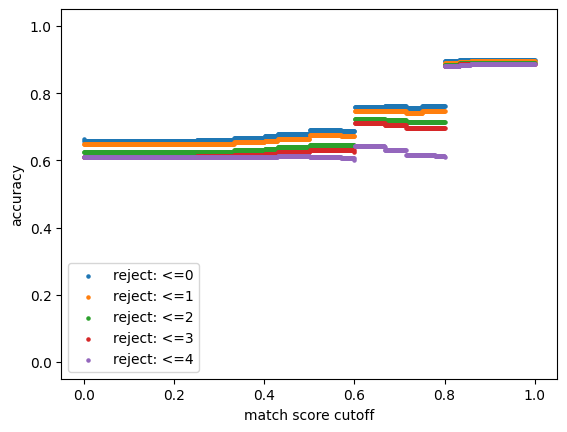

In [24]:
draw_plot(df=bigg_reac_df,
          degen_col='num_query_elements',
          val_col='accuracy',
          x_label='match score cutoff',
          save_path=os.path.join(MANU_FIGURE_DIR, 'f12-accuracy-reactions-bigg.pdf'))

In [24]:
# draw_plot(df=bigg_reac_df_pred,
#           degen_col='num_query_elements',
#           val_col='precision',
#           x_label='minimum match score',
#           save_path=os.path.join(TEMPFIG_DIR, 'bigg_reactions_precision_pred_species.png'))

In [25]:
# # BiGG reactions; using existing species annotations; 
# model_names = []
# num_rhea_eles = []
# num_query_eles = []
# num_candidates = []
# val_match_scores = []
# is_correct_included = []
# total_recalls = []
# total_precisions = []

# # for idx, one_bigg in enumerate(['e_coli_core.xml']):

# for idx, one_bigg in enumerate(biggs):
#   if idx % 10 == 0:
#     print("We are at: %d" % idx)
#   one_fpath = os.path.join(BIGG_DIR, one_bigg)
#   recom = recommender.Recommender(libsbml_fpath=one_fpath)
#   reacs2eval_raw = list(recom.reactions.exist_annotation.keys())
#   reacs2eval = []
#   for one_r in reacs2eval_raw: 
#     comps = recom.reactions.reaction_components[one_r]
#     if all([val in recom.species.exist_annotation_formula.keys() \
#               for val in comps]):
#       reacs2eval.append(one_r)
#   res = recom.reactions.predictAnnotation(inp_spec_dict=recom.species.exist_annotation_formula,
#                                           inp_reac_list=reacs2eval,
#                                           inp_ref_mat=ra.REF_MAT,
#                                           update=False)

#   refs = {val:recom.reactions.exist_annotation[val] \
#           for val in reacs2eval}   
#   preds = res['candidates']
#   recalls = tools.getRecall(ref=refs, pred=preds, mean=False) 
#   precisions = tools.getPrecision(ref=refs, pred=preds, mean=False)    
      
#   for one_k in res['match_score']:
#     one_reac = one_k
#     match_scores = [val[1] for val in res['match_score'][one_k]]
#     num_ref_elements = [getRheaElementNum(val) for val in res['candidates'][one_k]]
#     mean_num_rhea_elements = np.mean(num_ref_elements)   
#     num_query_ele = len(recom.reactions.reaction_components[one_reac])
#     num_cands = len(match_scores)
#     mean_match_score = np.mean(match_scores)
#     model_names.append(one_bigg)
#     num_rhea_eles.append(mean_num_rhea_elements)
#     num_query_eles.append(num_query_ele)
#     num_candidates.append(num_cands)
#     val_match_scores.append(mean_match_score)
#     if any(set(res['candidates'][one_k]).intersection(recom.reactions.exist_annotation[one_k])):
#       is_correct_included.append(1)
#     else:
#       is_correct_included.append(0)
    
#     total_recalls.append(recalls[one_reac])
#     total_precisions.append(precisions[one_reac])

         
# bigg_reac_df_exist = pd.DataFrame({'model': model_names,
#                                    'mean_num_rhea_elements': num_rhea_eles,
#                                    'num_query_elements': num_query_eles,
#                                    'num_candidates': num_candidates,
#                                    'match_score': val_match_scores,
#                                    'accuracy': is_correct_included,
#                                    'recall': total_recalls,
#                                    'precision': total_precisions})
# bigg_reac_df_exist.tail()

In [26]:
# len(np.unique(bigg_reac_df_exist['model']))

In [54]:
# bigg_reac_df_exist.to_csv(os.path.join(ACCURACY_DIR, 'bigg_reactions_plot_data_exist_species.csv'), index=False)

# # bigg_reac_test_df_exist = pd.read_csv(os.path.join(ACCURACY_DIR, 'bigg_reactions_plot_data_exist_species.csv'))
# # bigg_reac_test_df_exist.shape

In [27]:
# draw_plot(df=bigg_reac_df_exist,
#           degen_col='num_query_elements',
#           val_col='accuracy',
#           x_label='minimum match score',
#           save_path=os.path.join(TEMPFIG_DIR, 'bigg_reactions_accuracy_exist_species.png'))

In [28]:
# draw_plot(df=bigg_reac_df_exist,
#           degen_col='num_query_elements',
#           val_col='precision',
#           x_label='minimum match score',
#           save_path=os.path.join(TEMPFIG_DIR, 'bigg_reactions_precision_exist_species.png'))

## 5. Histograms of match scores

In [29]:
# # histograms: biomodels species
# plt.hist(biomd_spec_df['match_score'])

In [29]:
def draw_match_score_bar(df, save_path):
  """
  Draw a plot and save it
  
  Parameters
  ----------
  df: pandas.DataFrame
      Should have 'match_score' column
  
  save_path: str
      File path to save it. 
  """
  xs = []
  ys = []
  total_elements = df.shape[0]
  for min_score in np.arange(0.0, 1.01, step=0.01):
    xs.append(min_score)
    ys.append(df[df['match_score']<=min_score].shape[0]/total_elements)
  plt.bar(xs, ys, width=0.008)
  plt.xlim([-0.05, 1.05])
  plt.xlabel("match score cutoff")
  plt.ylabel("cumulative probability")

  plt.savefig(save_path, dpi=300, bbox_inches='tight', pad_inches=0.0)
  plt.show()

In [30]:
SUPPL_FIGURE_DIR

'/Users/woosubshin/Desktop/AutomateAnnotation/writeup/AMAS/Supple_figures_new'

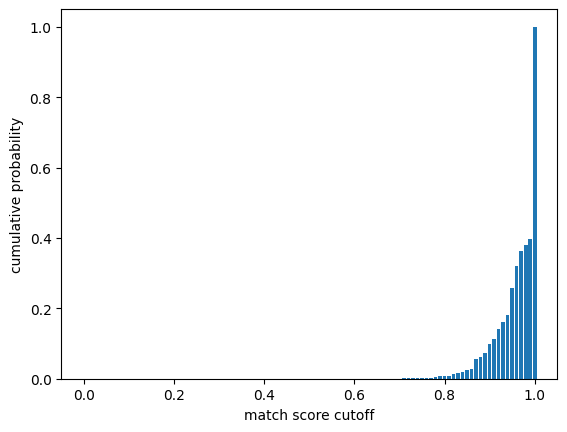

In [31]:
# cumulative distribution of match score: biomodel species
draw_match_score_bar(df=biomd_spec_df,
                     save_path=os.path.join(SUPPL_FIGURE_DIR, 
                                            'f21-matchscore-species-biomd.pdf'))

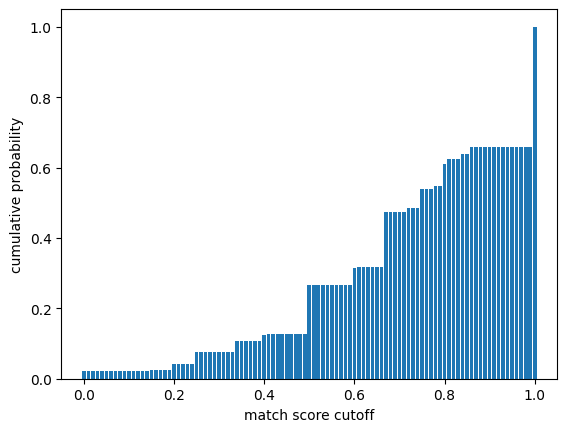

In [32]:
# cumulative distribution of match score: biomodel species
draw_match_score_bar(df=biomd_reac_df,
                     save_path=os.path.join(SUPPL_FIGURE_DIR,
                                            'f22-matchscore-reactions-biomd.pdf'))

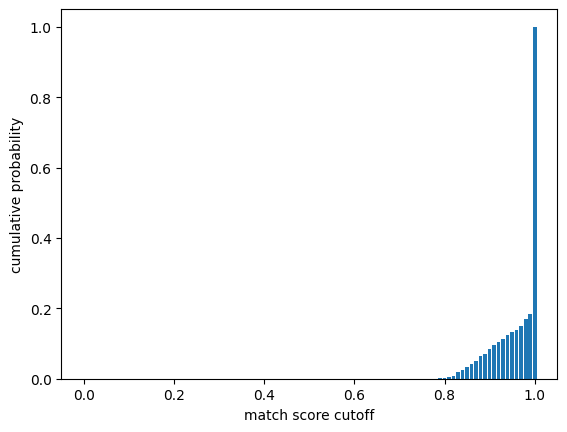

In [33]:
# cumulative distribution of match score: biomodel reactions
draw_match_score_bar(df=bigg_spec_df,
                     save_path=os.path.join(SUPPL_FIGURE_DIR,
                                            'f11-matchscore-species-bigg.pdf'))

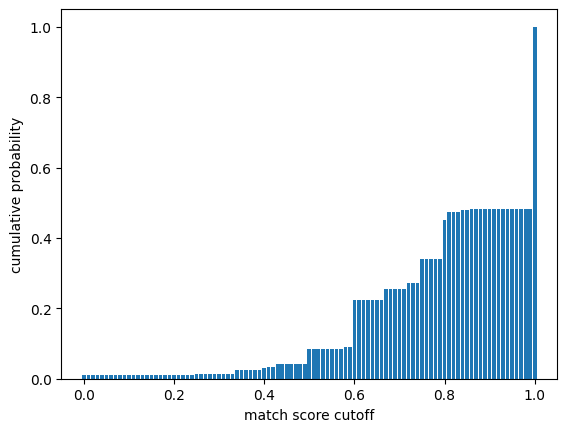

In [34]:
# cumulative distribution of match score: bigg reactions, pred_species
draw_match_score_bar(df=bigg_reac_df,
                     save_path=os.path.join(SUPPL_FIGURE_DIR,
                                            'f12-matchscore-reactions-bigg.pdf'))

In [35]:
# # cumulative distribution of match score: bigg reactions, pred_species
# draw_match_score_bar(df=bigg_reac_df_exist,
#                      save_path=os.path.join(TEMPFIG_DIR, 'bigg_reactions_existspecies_cdf_match_score.png'))

## *Proportion of null predictions

In [36]:
def proportion_null_pred(df):
  """
  Compute proportion of null predictions
  
  Parameters
  ----------
  df: pandas.DataFrame
      Should have 'match_score' column
  """
  xs = []
  ys = []
  total_elements = df.shape[0]
  for min_score in np.arange(1.00, 0.45, step=-0.05):
    xs.append(min_score)
    predicted_obs = df[df['match_score']>=min_score].shape[0]
    ys.append(1.0 - predicted_obs/total_elements)
  comb_list = list(zip(xs, ys))
  for tup in comb_list:
    # print("%.02f: %.02f" % (tup[0], tup[1]))
    print("%.02f" % (tup[1]))
  return comb_list

In [38]:
res = proportion_null_pred(df=bigg_reac_df)

0.48
0.48
0.48
0.48
0.34
0.27
0.25
0.22
0.09
0.09
0.04


## "Exactness" plots

In [39]:
# EXACTNESS_DIR = os.path.join(TEMPFIG_DIR, 'plots/exactness_scatter')

In [48]:
def draw_exact_plot(df, degen_col, val_col, x_label, save_path):
  """
  Draw an exactness pot and save it
  
  Parameters
  ----------
  df: pandas.DataFrame
  
  degen_col: str
      Column name for degenerate case
      
  val_col: str
      Column name to compute exactness
      
  x_lavel: str
      Name of X axis
  
  save_path: str
      File path to save it. 
  """
  cutoffs = np.arange(0.0, 1.00, step=0.001)
  vals = dict()
  for one_degen in range(0, 5):
    ys = []
    xs = []
    val_tuples = []
    cut_df = df[df[degen_col]>one_degen]
    for one_c in cutoffs:
      xs.append(one_c)
      sub_df = cut_df[cut_df['match_score']>=one_c]
      ave_exactness = np.mean(1/sub_df[val_col])
      ys.append(ave_exactness)
      # val_tuples.append((one_c, ave_exactness))
    print(np.min(ys))
    vals[str(one_degen)] = val_tuples
    plt.scatter(xs, ys, s=5, label='reject: <=%d'%one_degen)
  plt.legend(loc='lower left')
  plt.ylim([-0.05,1.05])
  plt.xlabel(x_label)
  plt.ylabel('exactness')
  plt.savefig(save_path, dpi=300, bbox_inches='tight', pad_inches=0.0)
  plt.show()

0.782595823198479
0.7909644394089607
0.8078699668487133
0.9012334604171339
0.9218810959671322


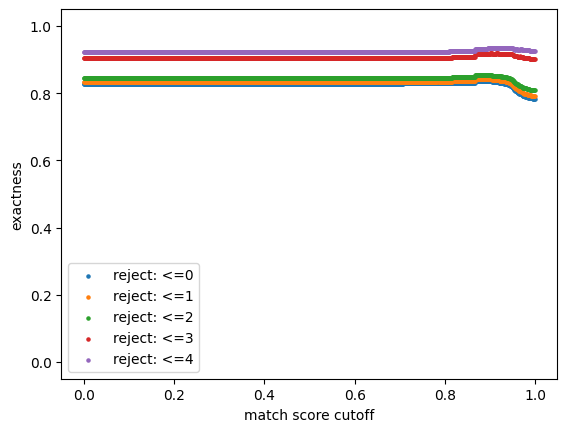

In [49]:
s = draw_exact_plot(df=biomd_spec_df,
                degen_col='name_length',
                val_col='num_formulas',
                x_label='match score cutoff',
                save_path=os.path.join(SUPPL_FIGURE_DIR,
                                       'f21-exactness-species-biomd.pdf'))

In [81]:
# almost same as precision, but exactness has a much higher starting point; 
# some valules have large predicted sets (and it still has a correct valule)

0.3353012814274286
0.33974669553273196
0.4979274428215986
0.556230469990673
0.6588996413464632


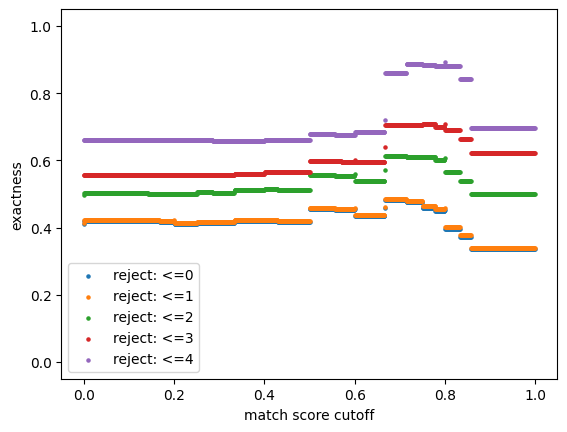

In [50]:
draw_exact_plot(df=biomd_reac_df,
                degen_col='num_query_elements',
                val_col='num_candidates',
                x_label='match score cutoff',
                save_path=os.path.join(SUPPL_FIGURE_DIR,
                                       'f22-exactness-reactions-biomd.pdf'))

0.9305507445378236
0.9305507445378236
0.9327330393557781
0.9331316379973986
0.9341257304294804


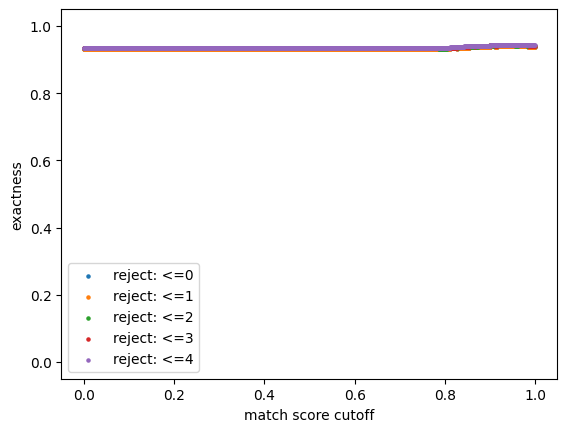

In [51]:
draw_exact_plot(df=bigg_spec_df,
                degen_col='name_length',
                val_col='num_formulas',
                x_label='match score cutoff',
                save_path=os.path.join(SUPPL_FIGURE_DIR,
                                       'f11-exactness-species-bigg.pdf'))

In [84]:
# draw_exact_plot(df=bigg_reac_df_exist,
#                 degen_col='num_query_elements',
#                 val_col='num_candidates',
#                 x_label='minimum match score',
#                 save_path=os.path.join(EXACTNESS_DIR, 'bigg_reactions_exactness_exist_species.png'))

0.4177552533062133
0.442282905321191
0.49377184112913935
0.4979800693134714
0.49036308110521476


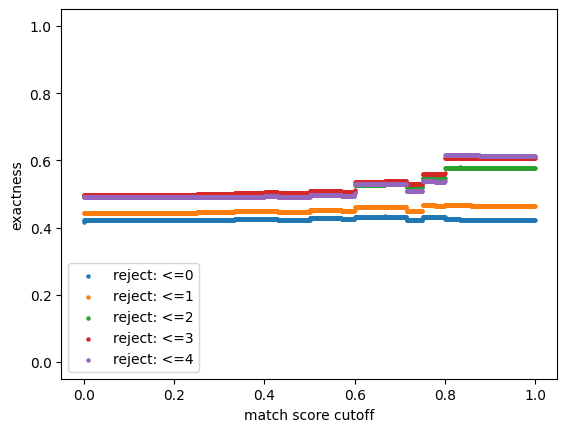

In [52]:
draw_exact_plot(df=bigg_reac_df,
                degen_col='num_query_elements',
                val_col='num_candidates',
                x_label='match score cutoff',
                save_path=os.path.join(SUPPL_FIGURE_DIR,
                                       'f12-exactness-reactions-bigg.pdf'))

## All Combined Bar plots

In [47]:
# COMB_BARS_DIR = '/Usears/woosubs/Desktop/AutomateAnnotation/AMAS_suppl/figure_files/temp/plots/all_comb_bars'

In [61]:
# below is original for manuscript figures
plot_min_scores = [0.4, 0.8, 0.9, 0.95]
# below is just to test;
# plot_min_scores = [0.4, 0.6, 0.8, 0.9, 0.95]

def getCombData(df,
                degen_col,
                degen_cut,
                val_col,
                min_scores=plot_min_scores):
  """
  Get data to draw bar plots describing
  accuracy, exactness, and nonempty. 
  
  
  Parameters
  ----------
  df: pandas.DataFrame
  
  degen_col: str
      Column name for degenerate case

  degen_cut: int
      Number of degenerate cases
      (only observations with higher values
      willl be chosen)

  val_col: str
      Column name to compute exactness
      
  min_scores: list-float
      List of minimum match scores
      
  Returns
  -------
  pandas.DataFrame
  """
  min_accuracy = []
  min_exactness = []
  prop_nonempty = []
  cut_df = df[df[degen_col]>degen_cut]
  for one_c in min_scores:
    sub_df = cut_df[cut_df['match_score']>=one_c]
    min_accuracy.append(np.mean(sub_df['accuracy']))
    min_exactness.append(np.mean(1/sub_df[val_col]))
    prop_nonempty.append(sub_df.shape[0]/cut_df.shape[0])
  res_dict = {'match score cutoff': min_scores,
              'accuracy': min_accuracy,
              'exactness': min_exactness,
              'nonempty': prop_nonempty}
  comb_df = pd.DataFrame(res_dict)
  return comb_df

def getCombBars(df, save_path):
  """
  Draw combined bar graph
  and save it. 
  
  Parameters
  ----------
  df: pandas.DataFrame
  
  save_path: str
  """
  min_scores=[str(val) for val in plot_min_scores]
  ind = np.arange(len(min_scores))
  # Figure size
  plt.figure(figsize=(10,5))
  # Width of a bar 
  width = 0.17       

  # Plotting
  plt.bar(ind, df['accuracy'], width, label='accuracy')
  plt.bar(ind + width + 0.01, df['exactness'], width, label='exactness')
  plt.bar(ind + width*2 + 0.02, df['nonempty'], width, label='nonempty')
  plt.xticks(ind + width + 0.01, min_scores)
  plt.ylim([0,1.23])
  plt.yticks(np.arange(0.0, 1.2, step=0.2))
  plt.xlabel('match score cutoff')
  plt.legend()
  plt.savefig(save_path, dpi=300, bbox_inches='tight', pad_inches=0.0)
  plt.show()

In [89]:
# CHECK degen_cut 
bars_biomd_spec = getCombData(df=biomd_spec_df,
                  degen_col='name_length',
                  degen_cut=2,
                  val_col='num_formulas')

bars_bigg_spec =  getCombData(df=bigg_spec_df,
                  degen_col='name_length',
                  degen_cut=2,
                  val_col='num_formulas')

bars_biomd_reac = getCombData(df=biomd_reac_df,
                  degen_col='num_query_elements',
                  degen_cut=0,
                  val_col='num_candidates')

# bars_bigg_reac_exist = getCombData(df=bigg_reac_df_exist,
#                        degen_col='num_query_elements',
#                        degen_cut=2,
#                        val_col='num_candidates')

bars_bigg_reac = getCombData(df=bigg_reac_df,
                             degen_col='num_query_elements',
                             degen_cut=0,
                             val_col='num_candidates')



In [90]:
bars_biomd_reac

,match score cutoff,accuracy,exactness,nonempty
0,0.40,0.694202,0.419844,0.890768
1,0.60,0.772271,0.455279,0.728519
2,0.80,0.810204,0.452833,0.447898
3,0.90,0.754011,0.335301,0.341865
4,0.95,0.754011,0.335301,0.341865


In [91]:
bars_bigg_reac

,match score cutoff,accuracy,exactness,nonempty
0,0.40,0.667574,0.426325,0.975197
1,0.60,0.686182,0.428645,0.900687
2,0.80,0.761984,0.432107,0.655406
3,0.90,0.899467,0.421666,0.517780
4,0.95,0.899467,0.421666,0.517780


In [73]:
bars_bigg_spec

,match score cutoff,accuracy,exactness,nonempty
0,0.40,0.862877,0.932870,1.000000
1,0.80,0.864537,0.932741,0.998080
2,0.90,0.933936,0.939310,0.919917
3,0.95,0.974597,0.941968,0.867989


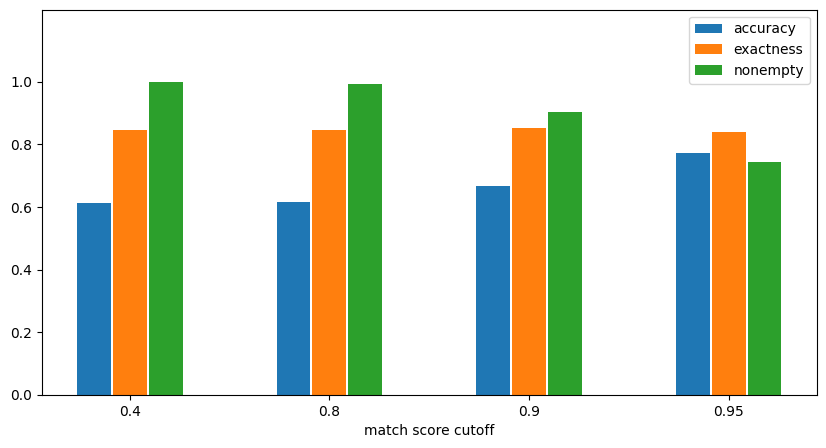

In [74]:
getCombBars(df=bars_biomd_spec,
            save_path=os.path.join(MANU_FIGURE_DIR,
                                   'f21-bars-species-biomd.pdf'))

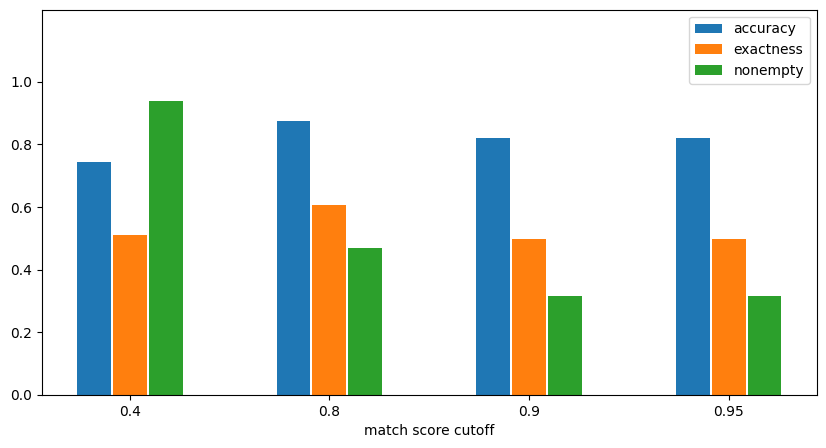

In [75]:
getCombBars(df=bars_biomd_reac,
            save_path=os.path.join(MANU_FIGURE_DIR,
                                   'f22-bars-reactions-biomd.pdf'))

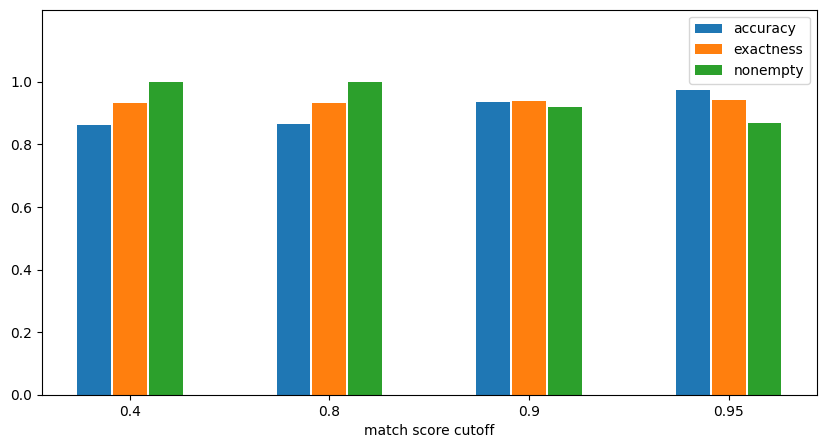

In [76]:
getCombBars(df=bars_bigg_spec,
            save_path=os.path.join(MANU_FIGURE_DIR,
                                   'f11-bars-species-bigg.pdf'))

In [77]:
# getCombBars(df=bars_bigg_reac_exist,
#             save_path=os.path.join(COMB_BARS_DIR, 'bigg_reac_bars_exist_species.png'))

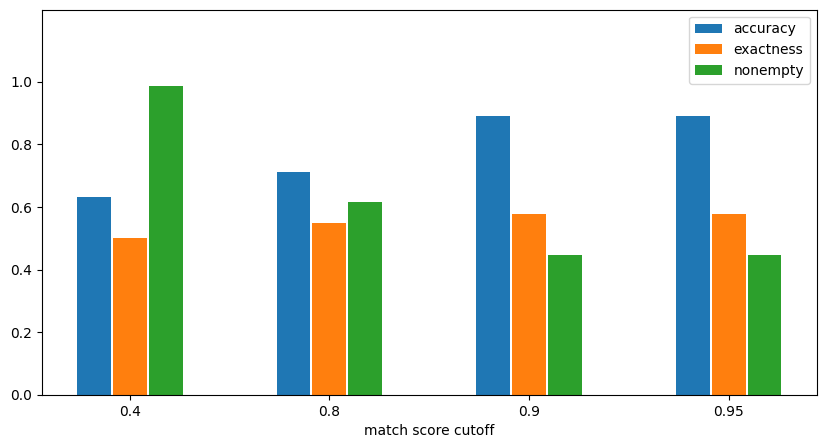

In [78]:
getCombBars(df=bars_bigg_reac,
            save_path=os.path.join(MANU_FIGURE_DIR,
                                   'f12-bars-reactions-bigg.pdf'))

## Another plot: accuracy for four cases (pred_species) with match score 0.9, reject=2

In [35]:
def getAccuracyVal(df,
                   len_col,
                   cutoff=0.9,
                   reject=2):
    """
    Get accuracy score
    
    Parameters
    ----------
    df: pandas.DataFrame
    
    cutoff: float
    
    reject: int
    
    Returns
    -------
    : float
    """
    sub_df = df[(df[len_col]>reject) & (df['match_score']>=cutoff)]
    return np.round(np.mean(sub_df['accuracy']), 2)

In [36]:
biomd_spec_ac = getAccuracyVal(df=biomd_spec_df,
                               len_col='name_length',
                               cutoff=0.95)
print(biomd_spec_ac)

biomd_reac_ac = getAccuracyVal(df=biomd_reac_df,
                               len_col='num_query_elements',
                               cutoff=0.95)
print(biomd_reac_ac)

bigg_spec_ac = getAccuracyVal(df=bigg_spec_df,
                               len_col='name_length',
                               cutoff=0.95)
print(bigg_spec_ac)

bigg_reac_ac = getAccuracyVal(df=bigg_reac_df_pred,
                               len_col='num_query_elements',
                               cutoff=0.95)
print(bigg_reac_ac)

0.77
0.94
0.97
0.92


,model,name_length,num_candidates,num_formulas,match_score,accuracy,recall,precision
0,BIOMD0000000002.xml,3,2,2,1.000,1,1.0,0.500
1,BIOMD0000000013.xml,5,4,3,0.866,1,1.0,0.333
2,BIOMD0000000013.xml,6,6,6,0.894,0,0.0,0.000
3,BIOMD0000000013.xml,10,2,1,0.849,1,1.0,1.000
4,BIOMD0000000013.xml,6,1,1,0.868,0,0.0,0.000


In [9]:
biomd_reac_df.head()

,model,mean_num_rhea_elements,num_query_elements,num_candidates,match_score,accuracy,recall,precision
0,BIOMD0000000003.xml,4.650943,1,106,0.242528,0,0.0,0.0
1,BIOMD0000000003.xml,4.650943,1,106,0.242528,0,0.0,0.0
2,BIOMD0000000004.xml,4.693548,2,248,0.233302,0,0.0,0.0
3,BIOMD0000000004.xml,4.693548,2,248,0.233302,0,0.0,0.0
4,BIOMD0000000005.xml,4.272727,2,22,0.292455,0,0.0,0.0


In [10]:
bigg_spec_df.head()

,model,name_length,num_candidates,num_formulas,match_score,accuracy,recall,precision
0,iCHOv1.xml,23,3,1,1.000,1,1.0,1.0
1,iCHOv1.xml,23,3,1,1.000,1,1.0,1.0
2,iCHOv1.xml,25,1,1,1.000,1,1.0,1.0
3,iCHOv1.xml,23,3,1,1.000,1,1.0,1.0
4,iCHOv1.xml,27,1,1,0.958,0,0.0,0.0


In [11]:
bigg_reac_df_pred.head()

,model,mean_num_rhea_elements,num_query_elements,num_candidates,match_score,accuracy,recall,precision
0,iCHOv1.xml,5.0,4,2,1.0,0,0.0,0.0
1,iCHOv1.xml,5.0,5,2,0.8,0,0.0,0.0
2,iCHOv1.xml,4.0,4,1,1.0,1,0.5,1.0
3,iCHOv1.xml,5.0,5,2,0.8,0,0.0,0.0
4,iCHOv1.xml,4.0,5,1,1.0,0,0.0,0.0


In [63]:
recom.getSpeciesRecommendation(pred_str='dihydrogen')

Recommendation(id='dihydrogen', candidates=[('CHEBI:18276', 1.0)], urls=['https://www.ebi.ac.uk/chebi/searchId.do?chebiId=CHEBI%3A18276'], labels=['dihydrogen'])

In [64]:
cn.REF_CHEBI2FORMULA['CHEBI:18276']

'H'

In [53]:
# For supplementary material S5, compare results of Jaccard vs. minimax
jaccard_biomd_reac_df = pd.read_csv(os.path.join(ACCURACY_DIR,
                                                 'biomd_reactions_plot_data_jaccard.csv'))
minimax_biomd_reac_df = pd.read_csv(os.path.join(ACCURACY_DIR,
                                                 'biomd_reactions_plot_data_minimax.csv'))


jaccard_bigg_reac_df = pd.read_csv(os.path.join(ACCURACY_DIR,
                                                'bigg_reactions_plot_data_pred_species_jaccard.csv'))
minimax_bigg_reac_df = pd.read_csv(os.path.join(ACCURACY_DIR,
                                                'bigg_reactions_plot_data_pred_species_minimax.csv'))


In [69]:
minimax_biomd_reac = getCombData(df=minimax_biomd_reac_df,
                                 degen_col='num_query_elements',
                                 degen_cut=0,
                                 val_col='num_candidates',
                                 min_scores=[0.6])
minimax_biomd_reac

,match score cutoff,accuracy,exactness,nonempty
0,0.6,0.772271,0.455279,0.728519


In [70]:
jaccard_biomd_reac = getCombData(df=jaccard_biomd_reac_df,
                                 degen_col='num_query_elements',
                                 degen_cut=0,
                                 val_col='num_candidates',
                                 min_scores=[0.6])
jaccard_biomd_reac

,match score cutoff,accuracy,exactness,nonempty
0,0.6,0.777286,0.689152,0.309872


In [71]:
minimax_bigg_reac = getCombData(df=minimax_bigg_reac_df,
                                 degen_col='num_query_elements',
                                 degen_cut=0,
                                 val_col='num_candidates',
                                 min_scores=[0.6])
minimax_bigg_reac

,match score cutoff,accuracy,exactness,nonempty
0,0.6,0.686182,0.428645,0.900687


In [62]:
jaccard_bigg_reac = getCombData(df=jaccard_bigg_reac_df,
                                 degen_col='num_query_elements',
                                 degen_cut=0,
                                 val_col='num_candidates',
                                 min_scores=[0.6])
jaccard_bigg_reac

,match score cutoff,accuracy,exactness,nonempty
0,0.6,0.8912,0.687747,0.35769


In [69]:
SUPPL_FIGURE_DIR

'/Users/woosubshin/Desktop/AutomateAnnotation/writeup/AMAS/Supple_figures_new'

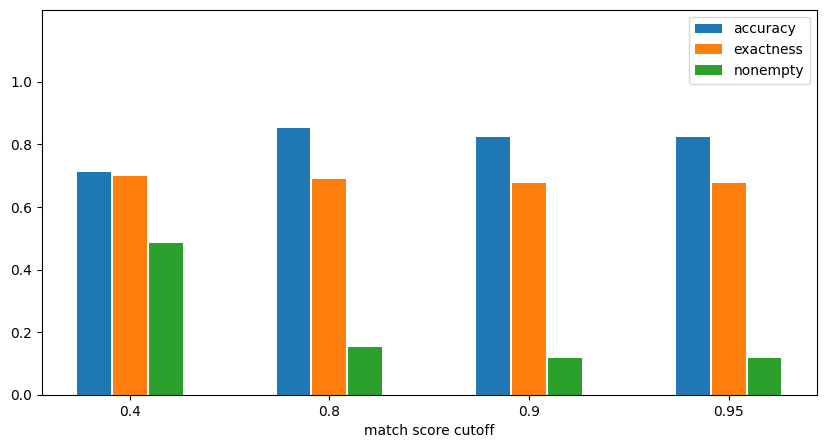

In [70]:
jaccard_bars_biomd_reac = getCombData(df=jaccard_biomd_reac_df,
                  degen_col='num_query_elements',
                  degen_cut=0,
                  val_col='num_candidates')
getCombBars(df=jaccard_bars_biomd_reac,
            save_path=os.path.join(SUPPL_FIGURE_DIR, 'jaccard-bars-reactions_biomd.pdf'))

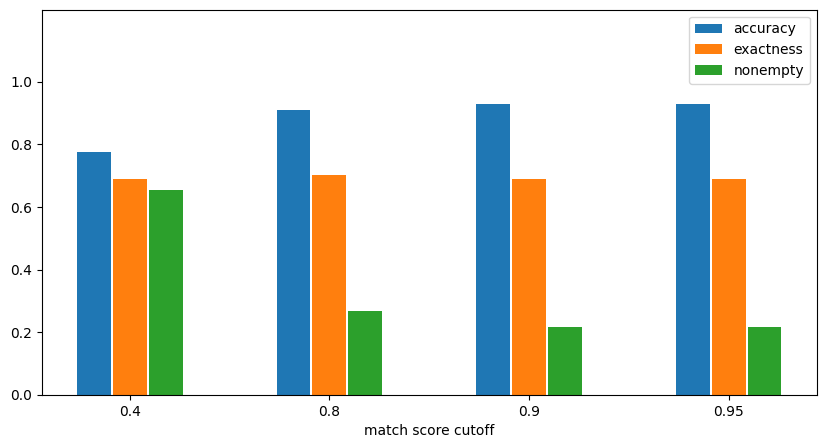

In [71]:
jaccard_bars_bigg_reac = getCombData(df=jaccard_bigg_reac_df,
                  degen_col='num_query_elements',
                  degen_cut=0,
                  val_col='num_candidates')
getCombBars(df=jaccard_bars_bigg_reac,
            save_path=os.path.join(SUPPL_FIGURE_DIR, 'jaccard-bars-reactions_bigg.pdf'))